## 导入库

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np 
import matplotlib.pyplot as plt

print(tf.__version__)

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.10.0


## 导入数据集

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 探索数据

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

## 预处理数据

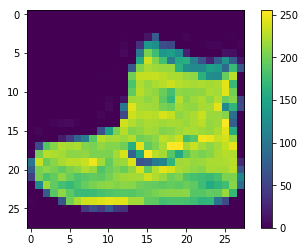

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

在馈送到神经网络模型之前，我们将这些值缩放到0到1的范围。为此，将图像组件的数据类型从整数转换为float，并除以255.这是预处理图像的函数：

以同样的方式对训练集和测试集进行预处理非常重要：

In [10]:
train_images = train_images/255.0
test_images = test_images/255.0

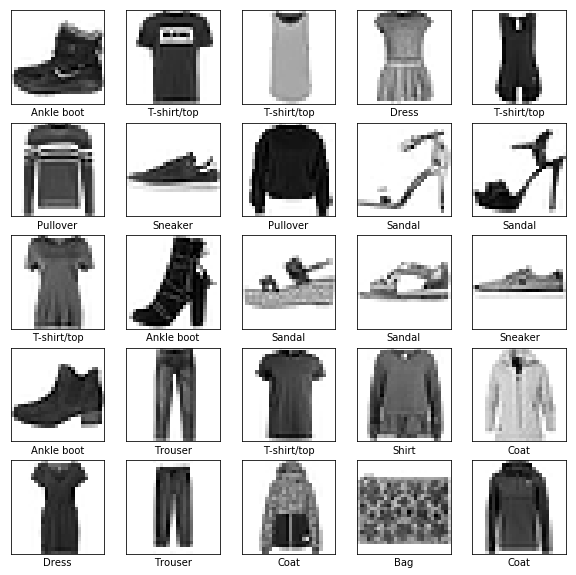

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)#要生成5行5列，这是第一个图plt.subplot('行','列','编号')
    #xsticks与yticks：指定坐标轴的刻度
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)#图像二值化
    plt.xlabel(class_names[train_labels[i]])

## 建立模型

### 1、设置图层

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

### 2、编辑模型

在模型准备好进行培训之前，它需要更多设置。这些是在模型的编译步骤中添加的：

- 损失函数 - 这可以衡量模型在训练过程中的准确程度。我们希望最小化此功能，以便在正确的方向上“引导”模型。
- 优化器 - 这是基于它看到的数据及其损失函数更新模型的方式。
- 度量标准 - 用于监控培训和测试步骤。以下示例使用精度，即正确分类的图像分数。

In [13]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 训练模型

In [14]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.4945 - acc: 0.8250
Epoch 2/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.3704 - acc: 0.8648
Epoch 3/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.3343 - acc: 0.8780
Epoch 4/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.3134 - acc: 0.8863
Epoch 5/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.2959 - acc: 0.8914


## 评估准确性

In [15]:
test_loss,test_acc = model.evaluate(test_images,test_labels)
print('Test accuracy:',test_acc)

10000/10000 [==============================] - 0s 28us/step
Test accuracy: 0.8783


## 作出预测

In [16]:
predictions = model.predict(test_images)

预测是10个数字的数组。这些描述了模型的“置信度”，即图像对应于10种不同服装中的每一种。我们可以看到哪个标签具有最高的置信度值：

In [17]:
predictions[0]

array([4.9563114e-05, 9.2114567e-07, 1.5139036e-05, 8.8786883e-06,
       6.9079665e-06, 6.2727486e-03, 1.2963913e-04, 1.2934588e-01,
       2.1342409e-04, 8.6395687e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

In [19]:
test_labels[0]

9

In [20]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

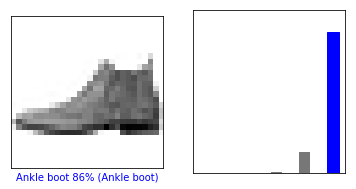

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)

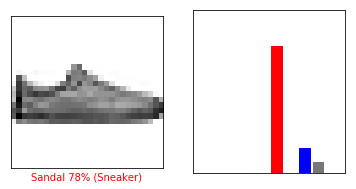

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)

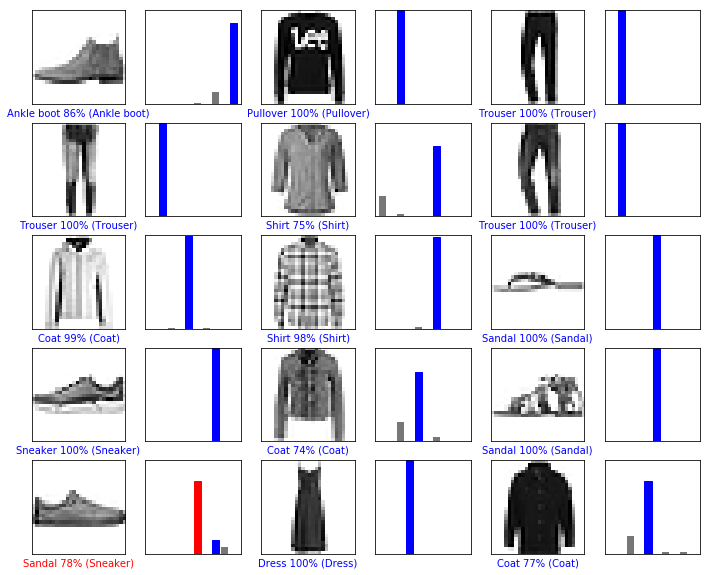

In [23]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions,test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions,test_labels)

In [24]:
img = test_images[0]
print(img.shape)

(28, 28)


In [25]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [26]:
predictions_single = model.predict(img)
print(predictions_single)

[[4.9563172e-05 9.2114499e-07 1.5139068e-05 8.8786473e-06 6.9079751e-06
  6.2727407e-03 1.2963927e-04 1.2934579e-01 2.1342434e-04 8.6395705e-01]]


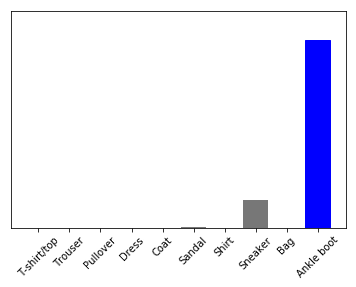

In [27]:
plot_value_array(0,predictions_single,test_labels)
_ =  plt.xticks(range(10),class_names,rotation = 45)

In [28]:
np.argmax(predictions_single[0])

9